In [3]:
import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

ImportError: DLL load failed: The specified module could not be found.

Bank Lines - Is it better to wait in a longer line with two tellers or a shorter line with only one?

A quantifiable question: What is the probability of being helped first given that you're in the two-teller line?

Step 1: How many people are already in each line as we enter the bank?

Assume that the number of people in the short line is normally distributed, and the number of people in the longer line is a uniformally distributed multiple of the number of people in the short line:

In [429]:
class Line:
    
    def __init__(self, name, mu, sd):
        self.name = name
        self.no_people = sp.norm(mu, sd)
    
    def Wait(self, *transit_time):
        Total_Wait = 0
        Wait_State = np.array([sp.poisson(transit_time).ppf(np.random.rand(1)[0])])
        for person in range(round(self.no_people.ppf(np.random.rand(1)[0]), 0).astype(int)): 
            New_Transit_Time = round(np.random.uniform(np.amin(transit_time), np.amax(transit_time), 1)[0],0)
            Wait_State[Wait_State <= 0] = sp.poisson(New_Transit_Time).ppf(np.random.rand(1)[0])
            Wait_Time = np.amin(Wait_State)
            Wait_State -= Wait_Time
            Total_Wait += Wait_Time
        return(Total_Wait)


In [497]:
def SimulateWait(Line, *TransTime):
    AggWait = []
    for simulation in range(50):
        AggWait.append(Line.Wait(TransTime))
    return(AggWait)

In [498]:
def AggWait(Data):
    df = pd.DataFrame(Data, columns = ["WaitTime"])
    df["Count"] = 1
    graphdata = df.groupby(["WaitTime"]).sum()
    return(graphdata)

In [499]:
def Graph(*Data):
    for figure in Data:
        plt.hist(figure["Count"])
    plt.show()
    

In [481]:
Long = Line("Long", 5, 1)
Short = Line("Short", 2, .5)

In [500]:
x = AggWait(SimulateWait(Long, 2))

In [521]:
x.Count.as_matrix()

array([3, 1, 7, 5, 6, 3, 6, 3, 2, 3, 5, 1, 2, 1, 2], dtype=int64)

(array([ 3.,  3.,  0.,  4.,  0.,  0.,  2.,  0.,  2.,  1.]),
 array([ 1. ,  1.6,  2.2,  2.8,  3.4,  4. ,  4.6,  5.2,  5.8,  6.4,  7. ]),
 <a list of 10 Patch objects>)

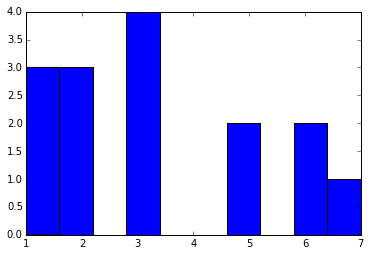

In [519]:
plt.hist(x.Count.as_matrix())

KeyError: 0.0

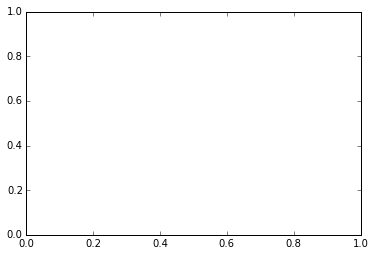

In [496]:
Graph(AggWait(SimulateWait(Long, 2)), AggWait(SimulateWait(Short, 2)))

Step 2: How long does each transaction take?

Assume that all three tellers operate at the same rate, poisson distributed, and that each teller and transaction are independent of each other